# 05. Analytics - PySpark

## 05.1. Importação das bibliotecas

### 05.1.1. Importando as bibliotecas nativas do Python

In [1]:
import sys

### 05.1.2. Importando as bibliotecas de terceiros

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

### 05.1.3. Importando os módulos locais do projeto

In [3]:
sys.path.append('..')
import functions.fn_charts_pandas as fn_charts_pandas
import functions.fn_stats_pyspark as fn_stats_pyspark
import params.consts as consts

## 05.2. Visão geral dos dados

### 05.2.0. Iniciando a sessão Spark

In [4]:
spark = SparkSession.builder.appName('spark').getOrCreate()

### 05.2.1. Habilitando a exibição de todas as colunas

In [5]:
pd.set_option('display.max_columns', None)

### 05.2.2. Armazenando o dataset em uma variável

In [6]:
df = spark.read \
    .format('parquet') \
    .load(consts.DATASET_CLEAN_PYSPARK)

### 05.2.3. Exibindo o dataset

In [7]:
df.show(5)

+-----+------+-----------+----------+----------------+------------------+--------------+-------------------+-----------+----------------------+--------+
|idade|  sexo|total_gasto|assinatura|duracao_contrato|tempo_como_cliente|frequencia_uso|ligacoes_callcenter|dias_atraso|meses_ultima_interacao|cancelou|
+-----+------+-----------+----------+----------------+------------------+--------------+-------------------+-----------+----------------------+--------+
| 62.0|Female|      410.0|     Basic|          Annual|              24.0|          30.0|                3.0|       13.0|                  27.0|     1.0|
| 29.0|  Male|      598.0|  Standard|          Annual|               7.0|          11.0|                7.0|       29.0|                   5.0|     1.0|
| 21.0|  Male|      988.0|   Premium|       Quarterly|              16.0|           9.0|                7.0|       23.0|                   9.0|     1.0|
| 23.0|  Male|      161.0|  Standard|       Quarterly|              59.0|         

## 05.3. Consolidação dos dados

### 05.3.1. Agrupando colunas e salvando em csv na camada gold para análise

- Agrupamento da coluna: sexo
+------+----------+------+
|sexo  |Percentage|Count |
+------+----------+------+
|Female|43.2      |381158|
|Male  |56.8      |500501|
+------+----------+------+



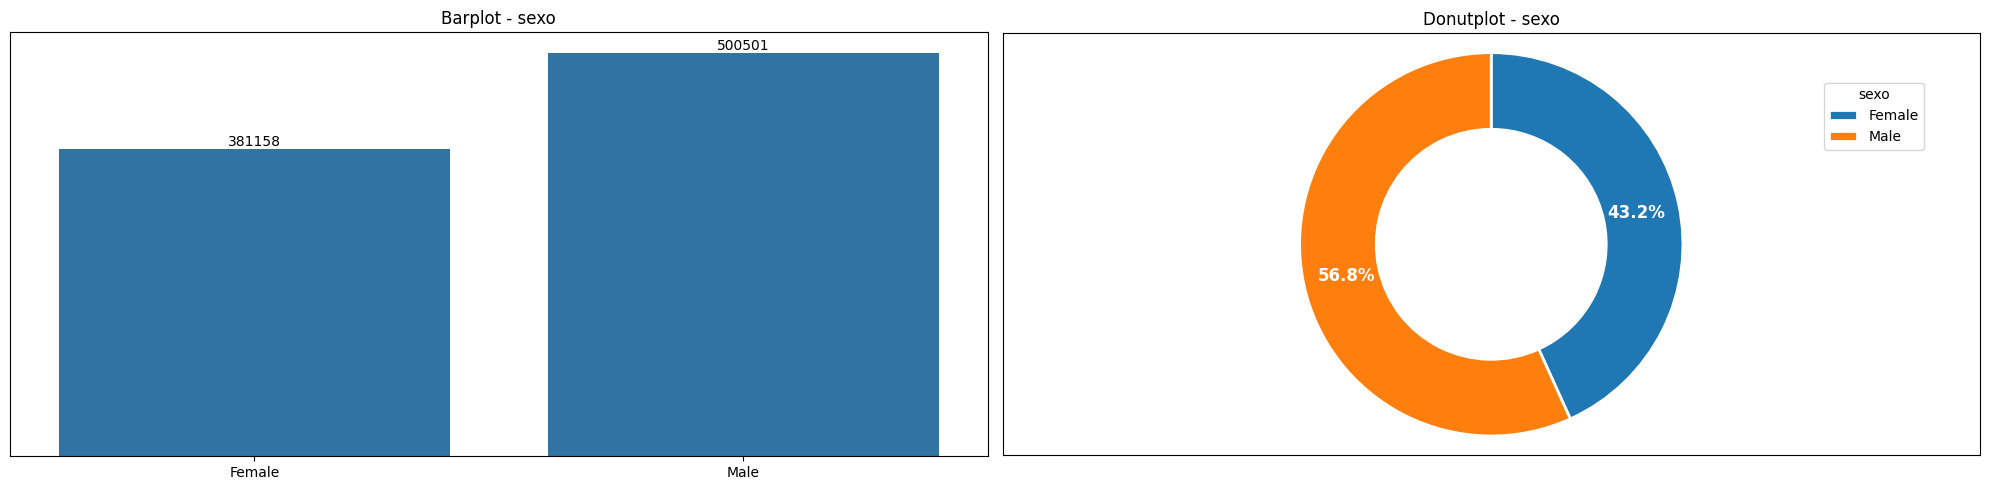

- Agrupamento da coluna: assinatura
+----------+----------+------+
|assinatura|Percentage|Count |
+----------+----------+------+
|Basic     |32.4      |286052|
|Premium   |33.7      |297353|
|Standard  |33.8      |298254|
+----------+----------+------+



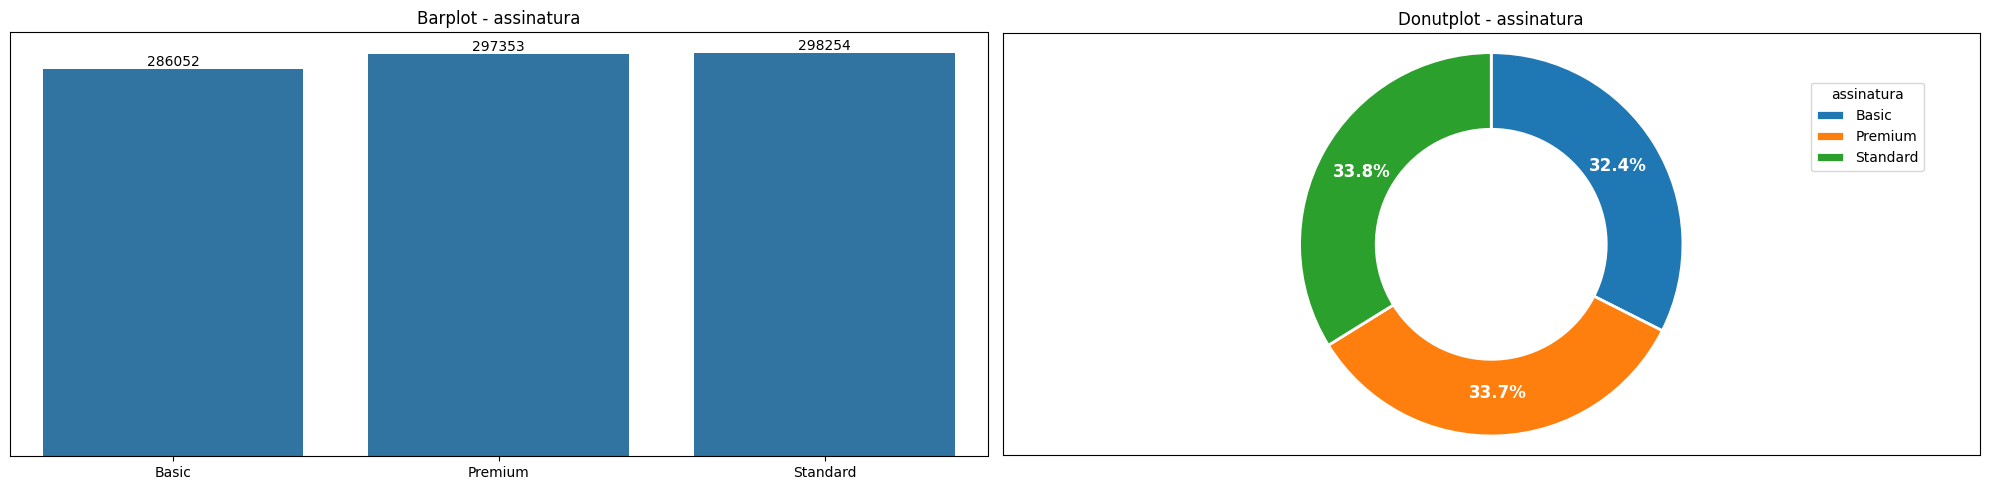

- Agrupamento da coluna: duracao_contrato
+----------------+----------+------+
|duracao_contrato|Percentage|Count |
+----------------+----------+------+
|Annual          |40.2      |354395|
|Monthly         |19.8      |174205|
|Quarterly       |40.0      |353059|
+----------------+----------+------+



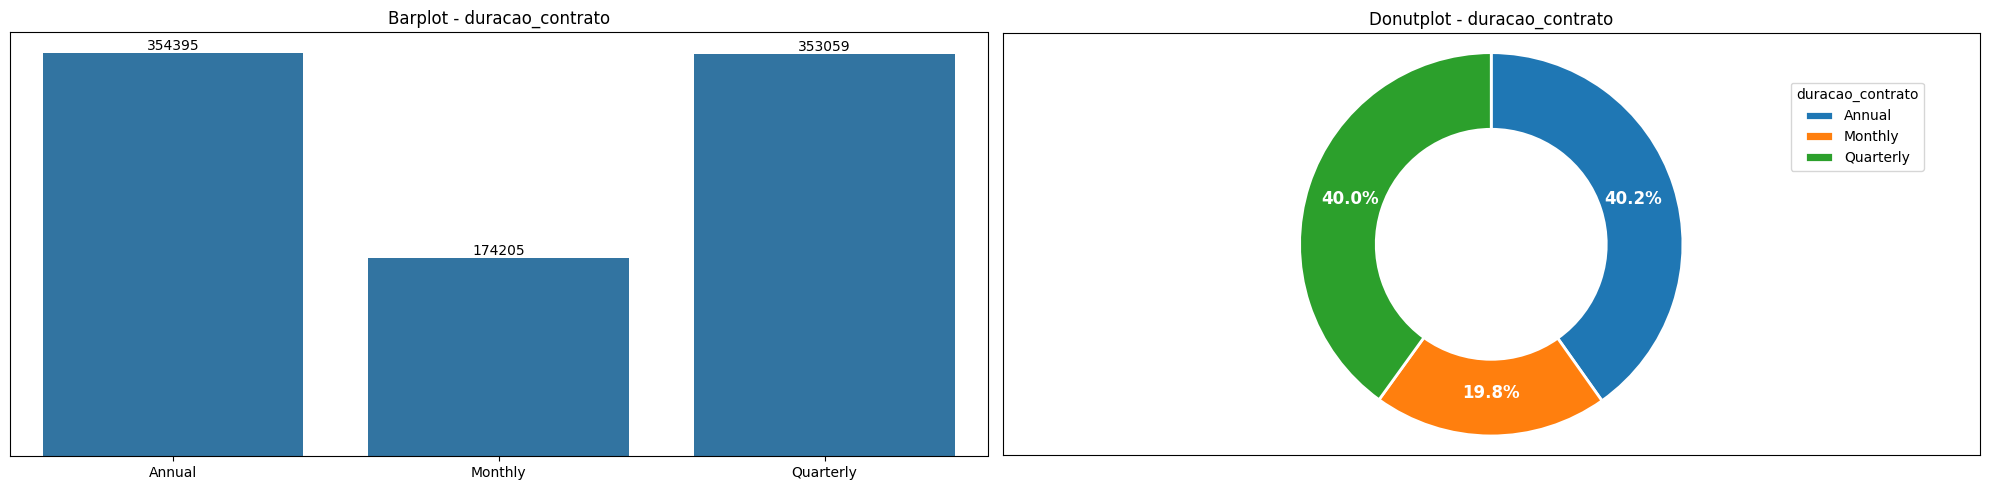

- Agrupamento da coluna: cancelou
+--------+----------+------+
|cancelou|Percentage|Count |
+--------+----------+------+
|0.0     |43.3      |381666|
|1.0     |56.7      |499993|
+--------+----------+------+



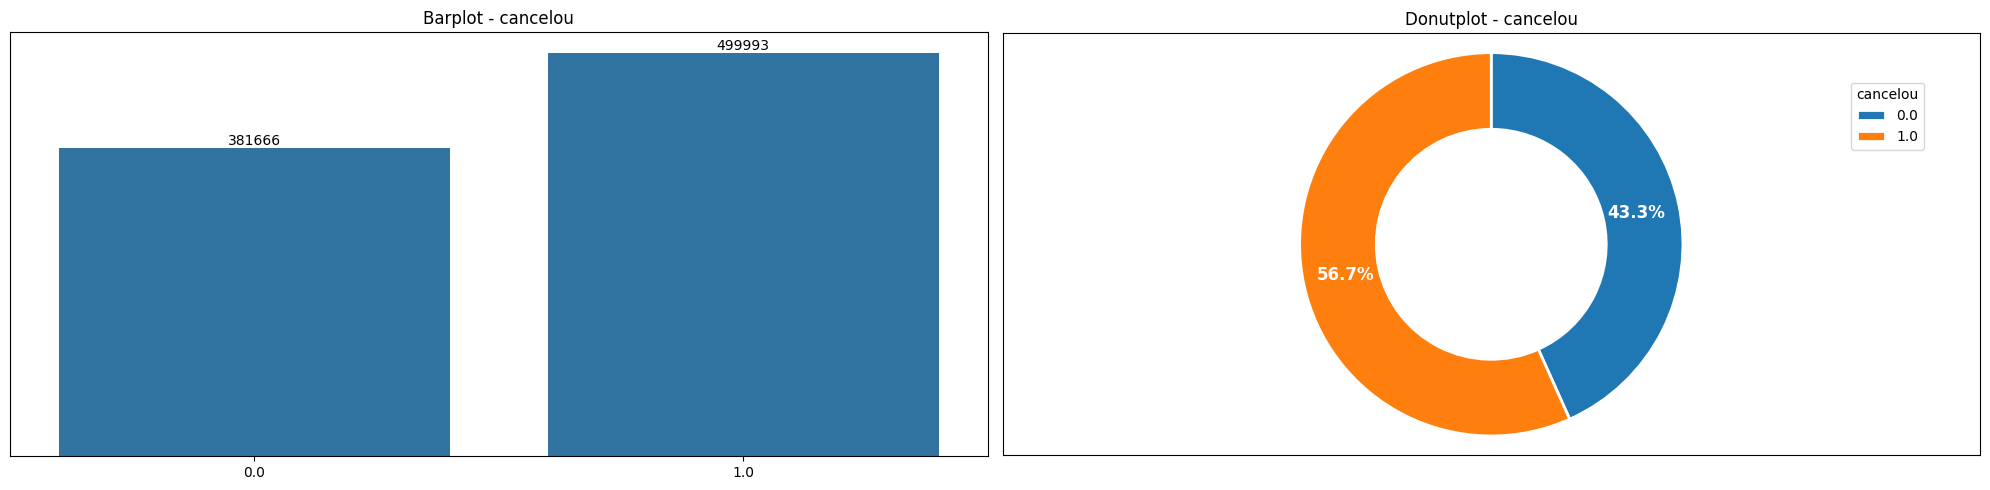

In [8]:
columns = ['sexo', 'assinatura', 'duracao_contrato', 'cancelou']

for i in columns:

    df_agg = fn_stats_pyspark.groupby_count(df, i)

    print(f'- Agrupamento da coluna: {i}')
    
    df_agg.show(truncate = False)

    df_agg.coalesce(1).write \
        .format('csv') \
        .mode('overwrite') \
        .option('header', 'true') \
        .option('sep', ',') \
        .save(f'../data/04_gold/agg_{i.lower()}_pyspark')

    fn_charts_pandas.barplot_donutplot(df_agg.toPandas(), i, 'Count')

    plt.savefig(f'../images/outputs/charts/pyspark/nb05_barplot_donutplot_{i.lower()}.png', format = 'png', dpi = 75, bbox_inches = 'tight', transparent = True)

    plt.show()